In [134]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [140]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [141]:
df.dropna(inplace=True)

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x=df[['Age','Fare']]
y=df['Survived']
x
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [147]:
# Check Accouracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6293706293706294

In [148]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy'))

0.6288732394366197

# Now use use Bins

In [149]:
# import discreatizar
from sklearn.preprocessing import KBinsDiscretizer

In [150]:
# BinsDiscretizar  object create
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [151]:
#Column Transformer use 
from sklearn.compose import ColumnTransformer
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

# Now fit Transfrom apply Column Transfrom 
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.fit_transform(x_test)

In [152]:
## See bins Distance create
## this is bins 
trf.named_transformers_['first'].bin_edges_

array([array([ 1.        ,  9.        , 15.9       , 17.        , 20.        ,
              21.        , 24.        , 26.        , 28.        , 30.1       ,
              33.66666667, 36.        , 38.6       , 44.06666667, 52.        ,
              62.        ])                                                   ],
      dtype=object)

In [153]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,   7.17166667,   7.77333333,   7.925     ,
                8.05      ,   9.5       ,  10.5       ,  13.        ,
               17.69333333,  22.62      ,  26.35276667,  31.275     ,
               38.1       ,  53.22666667,  79.27666667, 512.3292    ])],
      dtype=object)

In [154]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'Fare':x_train['Fare'],
    'Fare_trf':x_train_trf[:,1]
})
output.head()

,age,age_trf,Fare,Fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0


In [155]:
## Add labels in Age and fare Columns
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [156]:
output.sample(5)

,age,age_trf,Fare,Fare_trf,age_labels,fare_labels
499,24.0,5.0,7.7958,2.0,"(21.0, 24.0]","(7.773, 7.925]"
387,36.0,10.0,13.0000,6.0,"(33.667, 36.0]","(10.5, 13.0]"
412,33.0,9.0,90.0000,13.0,"(30.1, 33.667]","(79.277, 512.329]"
35,42.0,12.0,52.0000,12.0,"(38.6, 44.067]","(38.1, 53.227]"
25,38.0,11.0,31.3875,11.0,"(36.0, 38.6]","(31.275, 38.1]"


In [157]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)

In [158]:
accuracy_score(y_test,y_pred2)

0.6503496503496503

In [159]:
np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy'))

0.624706572769953

In [160]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    print(np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6331181533646323


NameError: name 'X' is not defined

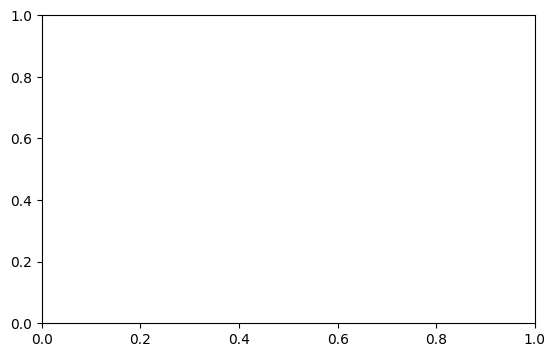

In [161]:
discretize(5,'kmeans')